# Librairie `matplotlib`

<div class="alert alert-block alert-danger">
    Si vous utilisez ce notebook via mybinder, pensez à télécharger votre fichier à la fin de la séance afin de conserver une trace de votre travail !
</div>

## Sale temps sur Seattle (suite) 

- À partir de l'histogramme représentant la distribution des hauteurs de précipitations à Seattle (*cf.* précédent TD), préciser les axes de la figure ainsi que le titre de l'histogramme

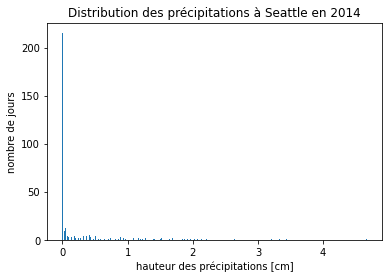

In [1]:
import numpy as np

data = np.loadtxt("./data/seattle2014.csv", delimiter=",")

day = data[:, 0]
prcp = data[:, 1] / 100  # cm
Tmax = data[:, 2] / 10  # °C
Tmin = data[:, 3] / 10  # °C

import matplotlib.pyplot as plt

plt.hist(prcp, 365)

plt.title("Distribution des précipitations à Seattle en 2014")
plt.xlabel("hauteur des précipitations [cm]")
plt.ylabel("nombre de jours");

- Changer l'axe $y$ pour passer en échelle logarithmique

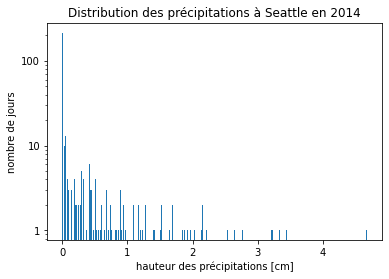

In [2]:
plt.hist(prcp, 365)

plt.title("Distribution des précipitations à Seattle en 2014")
plt.xlabel("hauteur des précipitations [cm]")
plt.ylabel("nombre de jours")
plt.yscale("log")
# Remove exponential notation
from matplotlib.ticker import ScalarFormatter

plt.gca().yaxis.set_major_formatter(ScalarFormatter())

- Annoter la figure pour faire apparaître la valeur moyenne et l'écart-type des précipitations

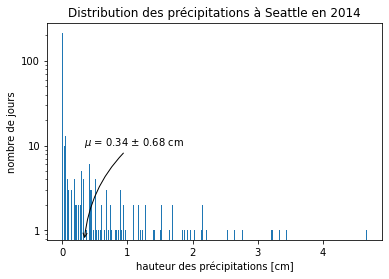

In [3]:
plt.hist(prcp, 365)

plt.title("Distribution des précipitations à Seattle en 2014")
plt.xlabel("hauteur des précipitations [cm]")
plt.ylabel("nombre de jours")
plt.yscale("log")
# Remove exponential notation
from matplotlib.ticker import ScalarFormatter

plt.gca().yaxis.set_major_formatter(ScalarFormatter())
# Affiche valeur moyenne et écart type
mean = np.mean(prcp)
std = np.std(prcp)

ymin, ymax = plt.gca().get_ylim()
plt.annotate(
    r"$\mu$ = {0:.2f} $\pm$ {1:.2f} cm".format(mean, std),
    xy=(mean, ymin),
    xytext=(mean, 10),
    arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"),
);

- Représenter sur une seconde figure, la variation temporelle des températures minimale et maximale. On s'aidera du code suivant pour convertir les jours extraits du fichier `csv` en une grandeur exploitable par `numpy`

```python
import pandas as pd
day = pd.to_datetime(day, format="%Y%m%d")
```

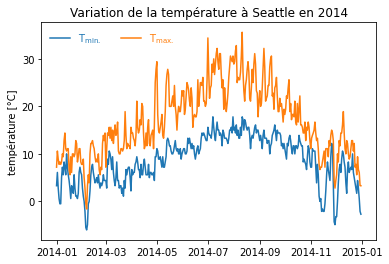

In [4]:
import pandas as pd

day = pd.to_datetime(day, format="%Y%m%d")

plt.plot(day, Tmin, label=r"T$_\mathrm{min.}$")
plt.plot(day, Tmax, label=r"T$_\mathrm{max.}$")
plt.title("Variation de la température à Seattle en 2014")
plt.ylabel("température [°C]")
plt.legend(labelcolor="linecolor", ncol=2);

- Sur une troisième figure, représenter la distribution des valeurs minimale et maximale des températures. Faire en sorte que les distributions puissent être visible y compris au niveau des zones de recouvrement

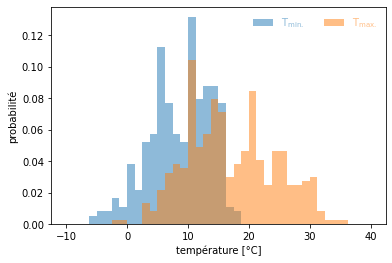

In [5]:
kwargs = dict(histtype="stepfilled", alpha=0.5, bins=40, range=(-10, 40))
plt.hist(Tmin, label=r"T$_\mathrm{min.}$", **kwargs, weights=np.ones_like(Tmin) / len(Tmin))
plt.hist(Tmax, label=r"T$_\mathrm{max.}$", **kwargs, weights=np.ones_like(Tmax) / len(Tmax))
plt.xlabel("température [°C]")
plt.ylabel("probabilité")
plt.legend(labelcolor="linecolor", ncol=2);

## Fonctions discontinues

- Représenter la fonction d'Heaviside $\Theta(x)$ définie par

\begin{align*}
      \left\{
        \begin{array}{lll}
          \Theta(x)&=1&\text{si } x \geq 0\\
          &=0&\text{sinon}
        \end{array}
        \right.
\end{align*}

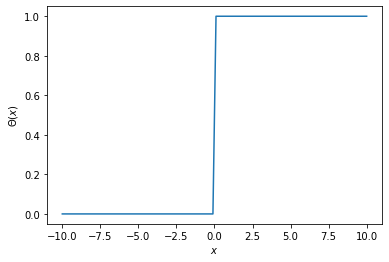

In [6]:
def heaviside(x):
    return 0.5 * (np.sign(x) + 1)


import numpy as np

x = np.linspace(-10, 10, 100)

import matplotlib.pyplot as plt

plt.plot(x, heaviside(x))
plt.xlabel(r"$x$")
plt.ylabel(r"$\Theta(x)$");

- Le noyau radioactif de $^{11}$C est un émetteur $\beta^{+}$ utilisé lors de tomographies par émission de positrons. La réaction permettant la production de cet élement est la suivante

\begin{align*}
p + ^{14}_{7}\text{N}\rightarrow ^{11}_{6}\text{C}+\alpha
\end{align*}

  En tenant compte du taux de production de $^{11}$C par irradiation et du nombre de noyaux se désintégrant, on peut montrer que le nombre de noyaux de $^{11}$C au cours du temps s'exprime de la façon suivante

\begin{align*}
      \left\{
        \begin{array}{lll}
          n(t)&=\frac{n_i}{\lambda}\left(1 - e^{-\lambda t}\right)&\text{si } t \leq t_0\\
          &=n(t_0)\,e^{-\lambda (t-t_0)}&\text{si } t > t_0
        \end{array}
        \right.
\end{align*}

  où $\lambda=\frac{\ln2}{T_{1/2}}$ et $T_{1/2}$ = 20.36 minutes. $n_i$ correspond au taux d'irradition et est égal à 3 10$^{8}$ noyaux/s. Représenter $n(t)$ pour $t_0$ = 3 heures. *On pourra s'aider ou pas de la fonction `piecewise` de `numpy`*.

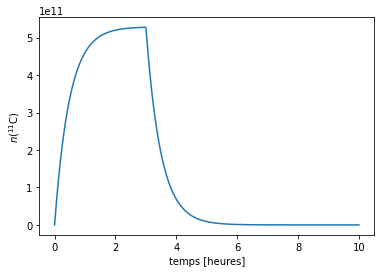

In [7]:
import numpy as np

# Définition des constantes du problème
ni = 3e8 * 3600  # noyaux/h
T12 = 20.36 / 60  # hours
l = np.log(2) / T12


def carbon11(t, t0):
    conds = [t <= t0, t > t0]
    funcs = [
        lambda t: ni / l * (1 - np.exp(-l * t)),
        lambda t: ni / l * (1 - np.exp(-l * t0)) * np.exp(-l * (t - t0)),
    ]
    return np.piecewise(t, conds, funcs)


t0 = 3  # hours
t = np.linspace(0, 10, 1000)
n = carbon11(t, t0)

import matplotlib.pyplot as plt

plt.plot(t, n)
plt.xlabel("temps [heures]")
plt.ylabel(r"$n(^{11}\mathrm{C})$");

À titre de comparaison, la fonction suivante

In [8]:
def carbon11bis(t, t0):
    import math

    y = np.empty(len(t))
    for i, val in enumerate(t):
        if t[i] <= t0:
            y[i] = ni / l * (1 - math.exp(-l * val))
        else:
            y[i] = ni / l * (1 - math.exp(-l * t0)) * math.exp(-l * (val - t0))
    return y

qui réalise le même calcul que `carbon11` défini plus haut mais sans user de la fonction `piecewise` de `numpy` est, peut-être plus naturelle à écrire mais n'en demeure pas moins beaucoup plus longue à exécuter

In [9]:
t = np.linspace(0, 10, 1000000)

%timeit carbon11(t, t0)

%timeit carbon11bis(t, t0)

35.3 ms ± 20 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
1.01 s ± 33.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## *Iris setosa, Iris virginica et Iris versicolor*

Le jeu de données *Iris* contient les propriétés morphologiques de 3 espèces de fleur d'iris collectées par Edgar Anderson. Ce jeu de données est surtout reputé par l'utilisation faite en 1936 par Ronald Fisher pour démontrer la puissance de son algorithme d'analyse discriminante linéaire à même de séparer les 3 espèces de fleur d'iris. Ces données sont devenues depuis un cas typique pour de nombreuses techniques de classification automatique en *machine learning*.

- Télécharger le fichier [`iris.csv`](https://raw.githubusercontent.com/xgarrido/licence_python_teaching/master/td/data/iris.csv) qui contient la longueur et la largeur des sépales en cm (colonne 1 et 2), la longueur et la largeur des pétales en cm (colonne 3 et 4) ainsi qu'une dernière colonne dont la valeur, 0, 1 ou 2, est relative à l'espèce de la fleur d'iris (0 = *iris setosa*, 1 = *iris versicolor*, 2 = *iris virginica*). Charger ce fichier dans un tableau `numpy`.

In [10]:
import numpy as np

data = np.loadtxt("./data/iris.csv", delimiter=",")

sepal_length = data[:, 0]
sepal_width = data[:, 1]
petal_length = data[:, 2]
petal_width = data[:, 3]
species = data[:, 4]

- Représenter les distributions normalisées de longueur et de largeur des sépales et des pétales pour les 3 espèces.

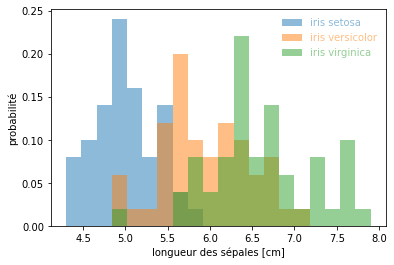

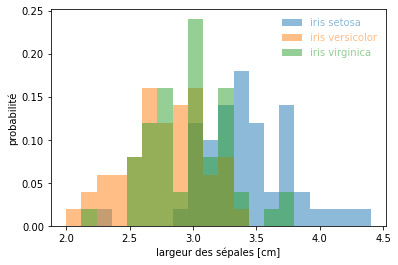

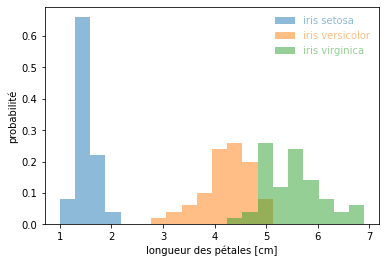

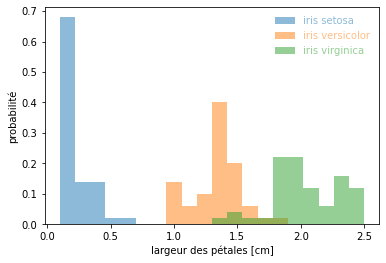

In [11]:
import matplotlib.pyplot as plt

style = dict(histtype="stepfilled", alpha=0.5, bins=20)

iris = {0: "iris setosa", 1: "iris versicolor", 2: "iris virginica"}
labels = {
    "longueur des sépales [cm]": sepal_length,
    "largeur des sépales [cm]": sepal_width,
    "longueur des pétales [cm]": petal_length,
    "largeur des pétales [cm]": petal_width,
}

for xlabel, data in labels.items():
    # Determine best range and bin probability
    r = (np.min(data), np.max(data))
    plt.figure()
    for key, name in iris.items():
        d = data[species == key]
        w = np.ones_like(d) / len(d)
        plt.hist(d, **style, label=name, range=r, weights=w)
        plt.xlabel(xlabel)
        plt.ylabel("probabilité")
        plt.legend(labelcolor="linecolor")

- Représenter dans un diagramme (largeur des sépales *vs.* longueur des sépales), la largeur des pétales ainsi que l'espèce de fleur d'iris considérée.

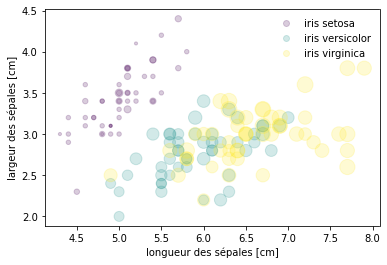

In [12]:
plt.scatter(sepal_length, sepal_width, s=100 * petal_width, c=species, cmap="viridis", alpha=0.2)
plt.xlabel("longueur des sépales [cm]")
plt.ylabel("largeur des sépales [cm]")

# Création d'une légende à partir d'un scatter plot vide
color = plt.cm.get_cmap("viridis")
for key, name in iris.items():
    rgba = color(key / 2)
    plt.scatter([], [], color=rgba, alpha=0.2, label=name)
plt.legend();

- Représenter l'ensemble des combinaisons possibles de données (largeur des sépales *vs.* longueur des sépales, largeur des sépales *vs.* largeur des pétales...), les figures situées dans la diagonale devant correspondre aux distributions normalisées des différentes grandeurs.

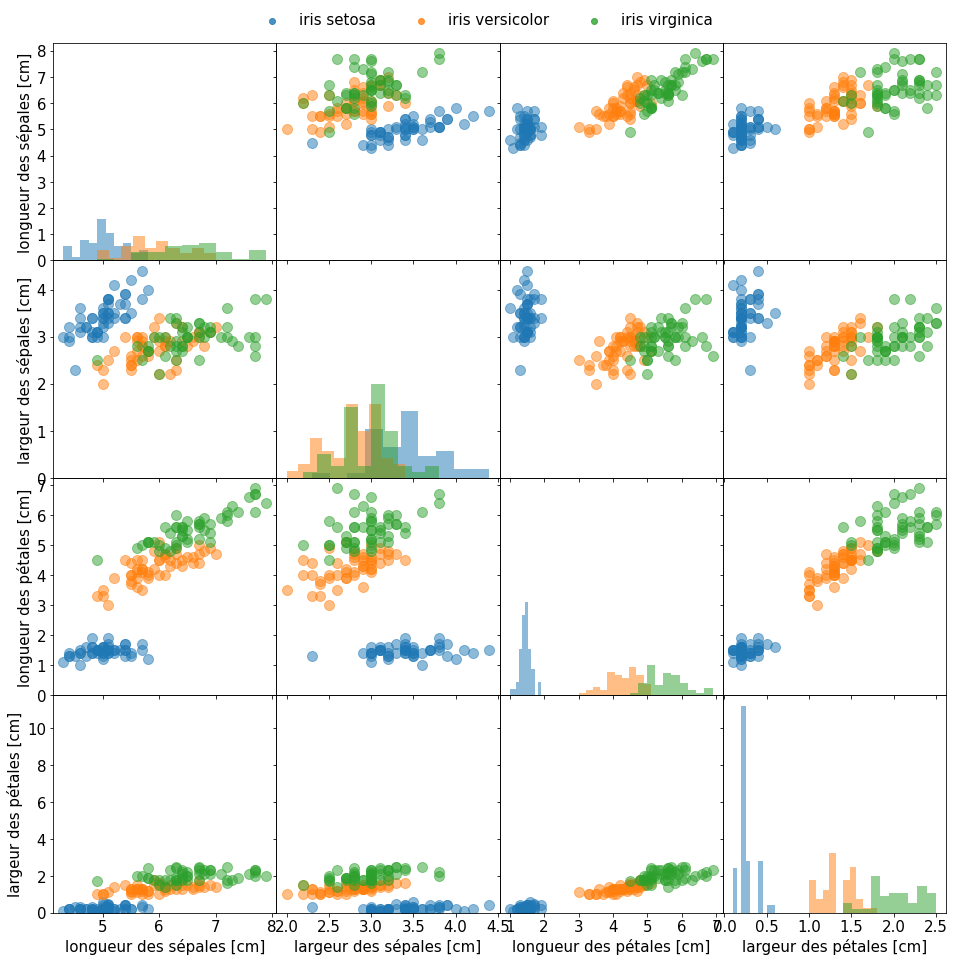

In [15]:
# Changement de taille de police uniquement pour cette figure
with plt.rc_context({"font.size": 15}):
    # Définition d'une grille de sous-figures
    fig, ax = plt.subplots(
        len(labels),
        len(labels),
        sharex="col",
        sharey="row",
        figsize=(4 * len(labels), 4 * len(labels)),
    )

    for i1, (l1, d1) in enumerate(labels.items()):
        for i2, (l2, d2) in enumerate(labels.items()):
            for key, name in iris.items():
                sc = species == key
                if l1 == l2:
                    ax[i1, i2].hist(d1[sc], alpha=0.5, bins=10, density=True)
                else:
                    ax[i1, i2].scatter(d2[sc], d1[sc], s=100, alpha=0.5)
                    ax[-1, i1].set_xlabel(l1)
                    ax[i1, 0].set_ylabel(l1)

    # Création d'une légende à partir d'un scatter plot vide
    for i, name in enumerate(iris.values()):
        plt.scatter([], [], c="C{}".format(i), alpha=0.8, label=name)
    fig.legend(bbox_to_anchor=(0.5, 0.9), loc="center", ncol=3)
    fig.subplots_adjust(wspace=0, hspace=0)